In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

seed = 7

data = pd.read_csv('data/sepsis_final.csv').drop(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID'], axis=1)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

X = data.drop(['28 Day Death', 'In Hospital Death'], axis=1)
y = data['28 Day Death']

for column in X.columns:
    X[column] = pd.to_numeric(X[column])
    X[column] = X[column].fillna(X[column].mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=seed)
clf.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: " + str(accuracy))

ROC AUC: 0.8303444401149039
Average Precision: 0.7769984314249441
Accuracy: 0.7410387710314558


In [3]:
import importlib
import medical_explainer
importlib.reload(medical_explainer)

<module 'medical_explainer' from '/home/llja/repos/Uni_ACS/medical_explainer.py'>

| Step 1  ==> Calibrating model


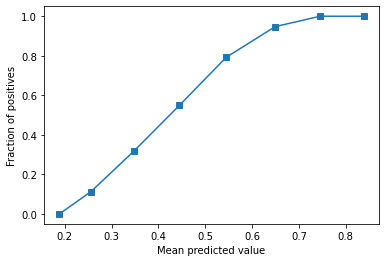

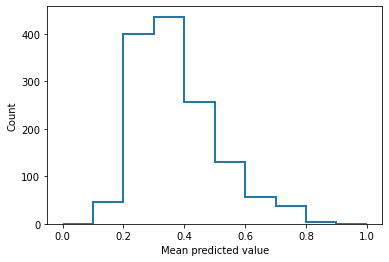

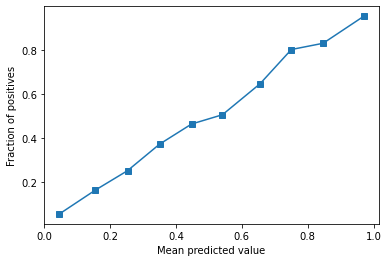

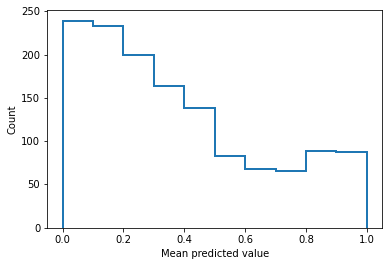

ROC AUC: 0.8303444401149039
Average Precision: 0.7769984314249441
Accuracy: 0.7410387710314558
ROC AUC: 0.8335647875454224
Average Precision: 0.7745523845217259
Accuracy: 0.7637161667885881

| Step 2 ==> Calculate SHAP values

| Step 3 ==> Fit clinical score calculator
Novel fitting


Probability threshold: 0.1
Score threshold: nan

Probability threshold: 0.5
Score threshold: 46.0

Probability threshold: 0.9
Score threshold: 58.0



In [4]:
explainer = medical_explainer.explainer(
    clf, X_train, y_train, X_test, y_test)

explainer.fit(10, shap_method='tree', method='novel', calculator_threshold=0.0001)

In [5]:
explainer.shap_array_list

[[-0.11206243520866356, 0.12097467471651031],
 [0.10838723210335507, -0.0646347105274237],
 [0.18570500691135172, -0.050985897999572455],
 [-0.09344738206170952, 0.06227558490384145],
 [-0.050970914406916486, 0.08369426716492866],
 [-0.03923309154600106, 0.025615028829764866],
 [-0.03578271844419215, 0.04552469877104997],
 [-0.04222141332768218, 0.0326942905141758],
 [-0.024304818491718328, 0.07032254130279611],
 [-0.022064370040320396, 0.041264941430984935]]

In [6]:
explainer.score_array_list

[array([-5.,  5.]),
 array([ 5., -3.]),
 array([ 8., -2.]),
 array([-4.,  3.]),
 array([-2.,  4.]),
 array([-2.,  1.]),
 array([-2.,  2.]),
 array([-2.,  1.]),
 array([-1.,  3.]),
 array([-1.,  2.])]

In [7]:
explainer.variables

array(['RDW', 'LOS', 'Fibrinogen, Functional', 'inotropes', 'Phosphate',
       'Lactate Dehydrogenase (LD)', 'Urea Nitrogen', 'Age',
       'Potassium, Whole Blood', 'PT'], dtype=object)

In [8]:
explainer.breakpoints_list

[[11.6, 15.492454180417397, 30.5],
 [-0.3222222222222222, 7.722370185786774, 294.66041666666666],
 [0.0, 374.42847568622966, 1773.0],
 [0.0, 0.7555952601707479, 3.0],
 [0.2, 3.8093183086226596, 17.3],
 [38.0, 273.09920837476176, 23111.0],
 [2.0, 32.866793518859545, 272.0],
 [18.258726899383984, 65.97985822696309, 90.0],
 [1.9, 4.289179283465936, 11.2],
 [9.4, 16.602456739379193, 151.0]]

In [9]:
scores,probs,predictions = explainer.predict_calculator(X_test, 1)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

# accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

# print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))


ROC AUC: 0.7539736119543646
Average Precision: 0.6697038264690048
Accuracy: 0.6430138990490124
[[841   3]
 [485  38]]
